In [36]:
import jieba
import pandas as pd
import os
import ast
import jieba.analyse
import jieba.posseg as pseg
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [3]:
current_path= os.getcwd()
test = pd.read_csv(current_path+'/24.csv')

In [3]:
test.head(10)

,Unnamed: 0,rpid,oid,type,mid,root,parent,dialog,count,rcount,...,member,content,replies,assist,folder,up_action,show_follow,invisible,video_zone,bvid
0,0,1284729876,39425207,1,4870926,0,0,0,258,250,...,"{'mid': '4870926', 'uname': '鬼才才才', 'sex': '保密...",{'message': '解释一下 为什么会多次用到呐喊 你可以把它比作失控的自己（没有办法...,"[{'rpid': 1285976257, 'oid': 39425207, 'type':...",0,"{'has_folded': False, 'is_folded': False, 'rul...","{'like': False, 'reply': False}",False,False,24,BV1Tt411678p
1,1,1279963249,39425207,1,106863567,0,0,0,1076,1042,...,"{'mid': '106863567', 'uname': '老实人初玖', 'sex': ...",{'message': '刀剑神域\n玉子市场\n声之形\n龙与虎\n可塑性记忆\n紫罗兰的...,"[{'rpid': 1280067978, 'oid': 39425207, 'type':...",0,"{'has_folded': False, 'is_folded': False, 'rul...","{'like': False, 'reply': True}",False,False,24,BV1Tt411678p
2,2,1279281708,39425207,1,440290,0,0,0,35,35,...,"{'mid': '440290', 'uname': '音乐鱼', 'sex': '男', ...","{'message': '看我刷出了什么！', 'plat': 1, 'device': '...","[{'rpid': 1279293020, 'oid': 39425207, 'type':...",0,"{'has_folded': False, 'is_folded': False, 'rul...","{'like': False, 'reply': False}",False,False,24,BV1Tt411678p
3,3,1279292485,39425207,1,59380884,0,0,0,111,100,...,"{'mid': '59380884', 'uname': '灰原哀ぃ', 'sex': '女...","{'message': '让我留在你身边', 'plat': 2, 'device': ''...","[{'rpid': 1279830755, 'oid': 39425207, 'type':...",0,"{'has_folded': False, 'is_folded': False, 'rul...","{'like': False, 'reply': False}",False,False,24,BV1Tt411678p
4,4,1451108527,39425207,1,32208506,0,0,0,24,24,...,"{'mid': '32208506', 'uname': 'Apple_Fan', 'sex...",{'message': '你成功出现在我主页上5次，前4次我都没点进来，第5次，我怕自己真的...,"[{'rpid': 2254566633, 'oid': 39425207, 'type':...",0,"{'has_folded': False, 'is_folded': False, 'rul...","{'like': True, 'reply': False}",False,False,24,BV1Tt411678p
5,5,1372119297,39425207,1,54089979,0,0,0,69,65,...,"{'mid': '54089979', 'uname': '徒然吓唬你', 'sex': '...","{'message': '番剧是什么？\n你看不懂，它是一幅画\n你看懂了，它是一首诗', ...","[{'rpid': 1945872826, 'oid': 39425207, 'type':...",0,"{'has_folded': False, 'is_folded': False, 'rul...","{'like': False, 'reply': False}",False,False,24,BV1Tt411678p
6,6,1425479524,39425207,1,193019818,0,0,0,626,623,...,"{'mid': '193019818', 'uname': '长大后的样子', 'sex':...",{'message': '写小说却被父母鄙视各种贬低，今年20岁我不会放弃，要我去死更加不可...,"[{'rpid': 1623180290, 'oid': 39425207, 'type':...",0,"{'has_folded': False, 'is_folded': False, 'rul...","{'like': False, 'reply': False}",False,False,24,BV1Tt411678p
7,7,1279306969,39425207,1,230492603,0,0,0,66,61,...,"{'mid': '230492603', 'uname': '傲娇老元首', 'sex': ...","{'message': '留在我的身边你也许会受伤，但是我不想放手。。。。', 'plat'...","[{'rpid': 1280263697, 'oid': 39425207, 'type':...",0,"{'has_folded': False, 'is_folded': False, 'rul...","{'like': False, 'reply': False}",False,False,24,BV1Tt411678p
8,8,1386948029,39425207,1,294904849,0,0,0,146,137,...,"{'mid': '294904849', 'uname': '上官巧倩', 'sex': '...","{'message': '“二次元在你心中有多重?” \n“三百克。” \n“原来那么轻啊,...","[{'rpid': 1544388071, 'oid': 39425207, 'type':...",0,"{'has_folded': False, 'is_folded': False, 'rul...","{'like': False, 'reply': False}",False,False,24,BV1Tt411678p
9,9,1390191303,39425207,1,398494999,0,0,0,174,163,...,"{'mid': '398494999', 'uname': '屋下木水', 'sex': '...",{'message': '感人的一些动漫语录 \n有些事情是不可能忘记的，只是一时想不起。\...,"[{'rpid': 1390310698, 'oid': 39425207, 'type':...",0,"{'has_folded': False, 'is_folded': False, 'rul...","{'like': False, 'reply': False}",False,False,24,BV1Tt411678p


In [4]:
content = test.loc[9, 'content'].replace("\'", "\"")
text = json.loads(content)
input = text['message']
print(input)

感人的一些动漫语录 
有些事情是不可能忘记的，只是一时想不起。
——《千与千寻》
不管发生什么绝对不要碰我哦，说好了哦！
——《萤火之森》
面码，找到你了！
——《未闻花名》
能哭的地方，只有厕所和爸爸的怀里。
——《clannad》
你不会说过，绝对不会死的吗？
——《海贼王》
我是夏目贵志，能告诉我你的名字吗？
——《夏目友人帐》
哥哥：“每当我想起了我没有了妹妹，我就会哭个不停。”
——《萤火虫之墓》
金木，回家吧。回家吧，英。
——《东京食尸鬼》
再也没有你的春天，要来了
——《四月是你的谎言》
就算发一千条短信，我们互相之间的心，也只会最多靠近一秒。
——《秒速五厘米》
	以栗山同学的未来建立起来的我的未来，我不需要！ 
——《境界的彼方》
我不要没有未来的未来！
——《境界的彼方》
		我做不到的由你来，你做不到的由我来。 
——《海贼王》
孤独的人不会伤害别人，只会不断地伤害自己罢了。
——《我的青春恋爱物语果然有问题》
虚伪的眼泪会伤害别人，虚伪的笑容会伤害自己
——《叛逆的鲁鲁修》
就算你将遗忘一切，我也会永远记得。
——《魔法禁书目录》
 痴情的妖怪啊，请再等一世吧
——《狐妖小红娘》
知识不能替代友谊，比起失去你，我宁愿做个白痴 
——《海绵宝宝》
我要用什么样的速度，才能与你相遇
——《秒速五厘米》
如果我们能活着出去的话，千山万水，你愿意陪我一起看吗？
——《狐妖小红娘》
说着想成为最好的自己，其实就是想成为你喜欢的样子。
——《昨日青空》
If the sound has a shape, it must be the way I love you. 
如果声音有形状，那一定是我爱你的样子。——《声之形》
你将不再是道具，而是人如其名的人。——少佐《紫罗兰永恒花园》
似乎那个网站只会与不幸的人相遇。所以她们才被选中了--——《魔法少女网站》
所谓朋友，就是不会让你孤独一人的存在哦。——天王寺瑚太朗《Rewrite》
我是一个经常笑的人，可我不是经常开心的人。——面码《未闻花名》
正因为生来什么都没有，因此我们能拥有一切。——《游戏人生》
就算是对我抱有敌意的人，也是被某个人深爱着而降生在这个世界上的。——集《罪恶王冠》
所谓正确，就是即使做错也不后悔。——红A《fate/stay night》


In [5]:
seg_list=jieba.cut(input)
print("Default Mode: " + "/ ".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.218 seconds.
Prefix dict has been built succesfully.


Default Mode: 感人/ 的/ 一些/ 动漫/ 语录/  / 
/ 有些/ 事情/ 是/ 不/ 可能/ 忘记/ 的/ ，/ 只是/ 一时/ 想不起/ 。/ 
/ —/ —/ 《/ 千与千寻/ 》/ 
/ 不管/ 发生/ 什么/ 绝对/ 不要/ 碰/ 我/ 哦/ ，/ 说好/ 了/ 哦/ ！/ 
/ —/ —/ 《/ 萤火/ 之森/ 》/ 
/ 面码/ ，/ 找到/ 你/ 了/ ！/ 
/ —/ —/ 《/ 未闻/ 花名/ 》/ 
/ 能/ 哭/ 的/ 地方/ ，/ 只有/ 厕所/ 和/ 爸爸/ 的/ 怀里/ 。/ 
/ —/ —/ 《/ clannad/ 》/ 
/ 你/ 不会/ 说/ 过/ ，/ 绝对/ 不会/ 死/ 的/ 吗/ ？/ 
/ —/ —/ 《/ 海贼王/ 》/ 
/ 我/ 是/ 夏目/ 贵志/ ，/ 能/ 告诉/ 我/ 你/ 的/ 名字/ 吗/ ？/ 
/ —/ —/ 《/ 夏目/ 友人/ 帐/ 》/ 
/ 哥哥/ ：/ “/ 每当/ 我/ 想起/ 了/ 我/ 没有/ 了/ 妹妹/ ，/ 我/ 就/ 会/ 哭/ 个/ 不停/ 。/ ”/ 
/ —/ —/ 《/ 萤火虫/ 之墓/ 》/ 
/ 金木/ ，/ 回家吧/ 。/ 回家吧/ ，/ 英/ 。/ 
/ —/ —/ 《/ 东京/ 食尸/ 鬼/ 》/ 
/ 再也/ 没有/ 你/ 的/ 春天/ ，/ 要来/ 了/ 
/ —/ —/ 《/ 四月/ 是/ 你/ 的/ 谎言/ 》/ 
/ 就算/ 发/ 一千条/ 短信/ ，/ 我们/ 互相/ 之间/ 的/ 心/ ，/ 也/ 只会/ 最多/ 靠近/ 一秒/ 。/ 
/ —/ —/ 《/ 秒速/ 五/ 厘米/ 》/ 
/ 	/ 以栗山/ 同学/ 的/ 未来/ 建立/ 起来/ 的/ 我/ 的/ 未来/ ，/ 我/ 不/ 需要/ ！/  / 
/ —/ —/ 《/ 境界/ 的/ 彼方/ 》/ 
/ 我/ 不要/ 没有/ 未来/ 的/ 未来/ ！/ 
/ —/ —/ 《/ 境界/ 的/ 彼方/ 》/ 
/ 	/ 	/ 我/ 做/ 不到/ 的/ 由/ 你/ 来/ ，/ 你/ 做/ 不到/ 的/ 由/ 我/ 来/ 。/  / 
/ —/ —/ 《/ 海贼王/ 》/ 
/ 孤独/ 的/ 人/ 不会/ 伤害/ 别人/ ，/ 只会/ 不断/ 地/ 伤害/ 自己/ 罢了/ 

In [6]:
tags=jieba.analyse.extract_tags(input,topK=100)
keyword = ",".join(tags)
print(keyword)
# 打印出关键词的权重
tags=jieba.analyse.extract_tags(input,topK=10, withWeight=True)
for tag,weight in tags:
    print('{}: {}'.format(tag, weight * 10000))

伤害,彼方,面码,海贼王,夏目,秒速,花名,只会,回家吧,未闻,红娘,魔法,就算,未来,不会,虚伪,相遇,孤独,境界,千与千寻,青空,少佐,厘米,之森,一千条,网站,没有,绝对,clannad,贵志,金木,食尸,以栗山,鲁鲁修,我要,sound,shape,must,way,love,声之形,寺瑚太朗,Rewrite,深爱着,fate,stay,night,经常,所谓,萤火,样子,别人,禁书,紫罗兰,千山万水,物语,就是,不到,自己,一秒,我们,王冠,之墓,一切,做错,萤火虫,不要,白痴,我爱你,痴情,降生,想不起,如其,敌意,谎言,道具,感人,叛逆,友人,海绵,语录,选中,动漫,生来,遗忘,宁愿,短信,妖怪,着想,永恒,罪恶,说好,开心,要来,天王,厕所,如果,友谊,青春,恋爱
伤害: 1182.8139030074688
彼方: 1062.4120633443983
面码: 992.0968882074687
海贼王: 992.0968882074687
夏目: 992.0968882074687
秒速: 992.0968882074687
花名: 954.5877493112033
只会: 943.5571814601659
回家吧: 871.3261635103734
未闻: 863.4166050207468


In [7]:
words=pseg.cut(keyword)
for word,flag in words:
    print('{}: {}'.format(word, flag))

伤害: a
,: x
彼方: r
,: x
面码: n
,: x
海贼王: n
,: x
夏: tg
目: t
,: x
秒: m
速: n
,: x
花名: n
,: x
只: d
会: v
,: x
回家吧: n
,: x
未闻: n
,: x
红娘: n
,: x
魔法: n
,: x
就算: v
,: x
未来: t
,: x
不会: v
,: x
虚伪: a
,: x
相遇: v
,: x
孤独: a
,: x
境界: n
,: x
千与千寻: i
,: x
青空: n
,: x
少佐: nr
,: x
厘米: q
,: x
之: u
森: n
,: x
一千条: m
,: x
网站: n
,: x
没有: v
,: x
绝对: d
,: x
clannad: eng
,: x
贵志: n
,: x
金木: nr
,: x
食尸: n
,: x
以: p
栗山: nr
,: x
鲁鲁修: nr
,: x
我: r
要: v
,: x
sound: eng
,: x
shape: eng
,: x
must: eng
,: x
way: eng
,: x
love: eng
,: x
声: q
之: u
形: n
,: x
寺瑚: n
太朗: ns
,: x
Rewrite: eng
,: x
深爱着: l
,: x
fate: eng
,: x
stay: eng
,: x
night: eng
,: x
经常: d
,: x
所谓: b
,: x
萤火: n
,: x
样子: n
,: x
别人: r
,: x
禁书: n
,: x
紫罗兰: ns
,: x
千山万水: i
,: x
物语: n
,: x
就是: d
,: x
不到: v
,: x
自己: r
,: x
一秒: m
,: x
我们: r
,: x
王冠: nr
,: x
之: u
墓: n
,: x
一切: r
,: x
做: v
错: n
,: x
萤火虫: n
,: x
不要: df
,: x
白痴: nr
,: x
我爱你: l
,: x
痴情: n
,: x
降生: v
,: x
想不起: v
,: x
如其: c
,: x
敌意: n
,: x
谎言: n
,: x
道具: n
,: x
感人: n
,: x
叛逆: v
,: x
友人: n
,: x
海绵: n
,: x
语

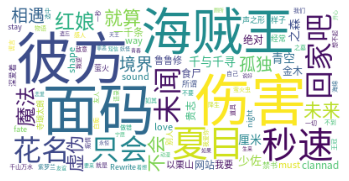

In [8]:
stopwords = {}.fromkeys(["没有","一个","什么","那个"])

wc = WordCloud(font_path="NotoSansSC-Regular.otf",
               background_color="white",
               max_words = 2000,
               stopwords=stopwords)
wc.generate(keyword)

plt.imshow(wc)
plt.axis("off")
plt.show()

In [39]:
row_num = test['content'].shape[0]
strlist = []
count = 0

for i in range(0, row_num):
    content = test.loc[i, 'content']
    temp = ast.literal_eval(content)
    text = temp['message']
    strlist.append(text)
    
input = '\n'.join(strlist)
print('完成')

完成


In [40]:
tags=jieba.analyse.extract_tags(input,topK=500)
keyword = ",".join(tags)
print(keyword)

doge,热词,up,视频,系列,三连,amp,封面,喜欢,滑稽,tv,动漫,真的,弹幕,大哭,二次元,这个,啊啊啊,什么,点赞,一个,不要,火影,call,BGM,bgm,就是,https,叫做,自己,吃瓜,没有,剪辑,知道,2233,看到,标题,少女,02,OK,感觉,可以,一种,我们,硬币,加油,那个,你们,投币,世界,不是,UP,音娘,E5%,8F%,时候,还是,电视,为什么,00,...,现在,觉得,一下,10,这么,巨人,首页,画风,希望,治愈,播放,哔哩,mad,com,但是,大佬,最后,微笑,评论,看过,曾经,因为,踩点,下次,怎么,一定,www,我要,剧情,好看,不会,剧场版,作品,动画,青春,结局,大家,哈哈哈,知识,&#,bilibili,突变,鸣人,所以,物语,永远,一起,可爱,海贼王,如果,__,老婆,为了,01,一样,名字,还有,这种,日常,泪目,女主,有点,darling,校园,一直,支持,魔法,人生,已经,捂脸,然后,素材,gt,想要,那么,他们,可能,游戏,进来,虽然,这样,很多,39,中二病,增加,朋友,画质,90%,神域,收藏,的话,看着,谢谢,漫画,男主,出来,老师,只是,96,刀剑,记得,不错,要白,只有,其实,害羞,温馨,title,81%,E9%,B0%,9D%,A2%,E6%,12,有人,JOJO,各位,关注,歪嘴,少年,MAD,34,开始,美好,主角,彼方,只要,星星,天使,海贼,b23,很棒,已三连,20,别人,木叶,18,境界,画面,首歌,发现,佐助,11,感谢,以为,进击,大笑,英雄,不过,卧槽,喜极而泣,感动,通知书,厉害,一次,洛天,呜呜,fate,手机,作者,东西,你币,温柔,应该,好像,火影忍者,一部,那些,男人,终于,孤独,太棒了,baidu,Fate,有个,lt,新人,卖萌,30,路飞,今天,恋爱,里面,QQ,粉丝,火钳,点个,这些,告诉,之刃,时间,番剧,音乐,生活,看看,努力,一天,看见,jojo,15,角色,不能,真是,野犬,dio,找到,转场,之瞳,两个,人物,热评,13,紫罗兰,推荐,提取,16,鬼灭,热血,未来,故事,这部,神仙,也许,简介,兵长,偷笑,不火,柯南,没白,2020,第二季,王冠,直接,学姐,谈恋爱,非常,突然,一句,以前,好家伙,疯狂,第一次,阴险,人类,play,女孩,

In [41]:
tags=jieba.analyse.extract_tags(input,topK=500, withWeight=True)
keyword_weight = {}
for tag, weight in tags:
    keyword_weight[tag] = weight * 10000 
print(keyword_weight)

{'doge': 1365.7273118413962, '热词': 790.4749602407783, 'up': 772.0273080716216, '视频': 549.9868761109446, '系列': 464.28001232214285, '三连': 410.58522541484973, 'amp': 405.52470470093385, '封面': 382.4348458321559, '喜欢': 345.5293485365464, '滑稽': 305.1976375912234, 'tv': 304.6405517357717, '动漫': 268.4088304314209, '真的': 267.60433366479754, '弹幕': 248.72253846851663, '大哭': 225.44766144683342, '二次元': 225.11683812436974, '这个': 217.5712239197001, '啊啊啊': 211.26607042587858, '什么': 209.69614421639392, '点赞': 202.13818366805185, '一个': 193.7232537595769, '不要': 188.6654614554183, '火影': 183.63167151202651, 'call': 179.57564166667737, 'BGM': 178.65094732235875, 'bgm': 177.03273221980115, '就是': 173.50286179438405, 'https': 171.99314804326463, '叫做': 171.94104237688197, '自己': 170.23388216453367, '吃瓜': 168.61801368650163, '没有': 154.77023452564268, '剪辑': 154.66991463165897, '知道': 151.74553902846807, '2233': 150.67894340672026, '看到': 150.21505389611124, '标题': 149.22229296562864, '少女': 144.20042600118168, '02': 14

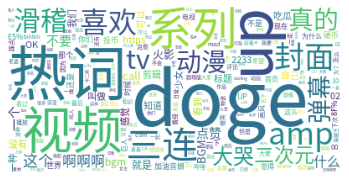

In [42]:
stopwords = ['up', '视频', '系列', '热词', '三连', 'xa0', 'amp', 'BGM', 'mad', '封面']

wc = WordCloud(font_path='NotoSansSC-Regular.otf',
               background_color='white',
               max_words = 2000, 
               stopwords=stopwords)

wc.generate_from_frequencies(keyword_weight)

plt.imshow(wc)
plt.axis("off")
plt.show()